# Investigating TMDb Movie Data 🎬
## Introduction

This project analyzes a dataset of over 10,000 movies from The Movie Database (TMDb). The goal is to explore factors that might influence movie success, such as revenue, budget, popularity, genre, and the number of cast members. By leveraging data analysis tools, we aim to uncover patterns and answer insightful questions related to movie performance over time.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

The dataset used in this project comes from [The Movie Database (TMDb)](https://www.themoviedb.org/). It includes information about over 10,000 movies such as budget, revenue, cast, genres, popularity, release date, and average user ratings. The dataset has already been cleaned by Udacity, but still includes some missing or inconsistent values.

#### Important Columns:
- **id**: Unique identifier for each movie
- **original_title**: Movie title
- **cast**: Main cast members (pipe-separated)
- **director**: Director of the movie
- **genres**: Movie genres (pipe-separated)
- **runtime**: Duration in minutes
- **budget_adj**: Adjusted budget (accounting for inflation)
- **revenue_adj**: Adjusted revenue (accounting for inflation)
- **release_date**: Release date
- **vote_average**: Average rating
- **popularity**: Popularity score

---

## Questions for Analysis

1. **What are the most popular genres over the years, and how has their frequency changed over time?**  
   This question explores trends in movie production by genre and helps us understand shifts in audience and industry preferences.

2. **What factors are most associated with high movie revenue?**  
   This question investigates which attributes — such as budget, average rating, popularity, or genre count — are correlated with successful box office performance.

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In this section, I loaded the TMDb dataset and began exploring its structure. The dataset contains information about movies such as title, cast, director, genres, budget, revenue, and more. I used `.info()` and `.head()` to get an initial view of the structure and types of data.

---


In [4]:
# Load your data and print out a few lines.
df = pd.read_csv("tmdb_5000_movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


 What is the size of your dataframe? 

In [5]:
df.shape

(4803, 20)

Perform operations to inspect data types 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

look for instances of missing

In [7]:
# Count missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


In [8]:
# Check for duplicated rows
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


In [9]:
# Summary statistics for numeric columns
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Initial Data Exploration

- The dataset contains **10866 rows** and **21 columns**.
- Several columns such as `homepage`, `tagline`, `keywords`, and `production_companies` contain many missing values.
- Some numerical columns (like `budget`, `revenue`, and `runtime`) include **zeros**, which likely represent missing or invalid data.
- The column `imdb_id` is unique for each movie and will not be useful for our analysis.
- There are no fully duplicated rows in the dataset.



### Data Cleaning

In this step, I created a clean copy of the dataset to work with. I then removed irrelevant columns that are not useful for analysis, such as IDs and textual metadata.

Next, I removed rows where the `budget`, `revenue`, or `runtime` was zero, as these values are not realistic and would skew the analysis.

---

#### Step 1: Make a copy of the original dataset

To keep the original dataset intact, we create a new copy and perform all cleaning steps on it.


In [10]:
df_clean = df.copy()

#### Step 2: Drop irrelevant columns

We drop columns that are not useful for our analysis, such as identifiers, homepage links, and descriptions. These columns do not contribute to our research questions.


In [15]:
# Drop columns that are not useful for analysis
columns_to_drop = ['id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']
df_clean.drop(columns=columns_to_drop, axis=1, inplace=True)

#### Step 3: Remove rows with zero values in 'budget', 'revenue', and 'runtime'

Zero values in these columns are unrealistic and can distort the analysis, so we remove those rows.


In [22]:
# Remove rows with unrealistic values in key columns
df_clean = df_clean[(df_clean['budget'] != 0) & (df_clean['revenue'] != 0) & (df_clean['runtime'] != 0)]

#### Step 4: Convert release_date to datetime format

This allows us to extract the year and analyze trends over time.


In [24]:
df_clean["release_date"]= pd.to_datetime(df_clean["release_date"])

C:\Users\janaa\AppData\Local\Temp\ipykernel_7864\3076458729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["release_date"]= pd.to_datetime(df_clean["release_date"])


#### Step 5: Extract release year

We create a new column to hold the release year, which will help in answering questions related to trends over the years.


In [25]:
# Create a new column for release year
df_clean['release_year'] = df_clean['release_date'].dt.year

C:\Users\janaa\AppData\Local\Temp\ipykernel_7864\636244129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['release_year'] = df_clean['release_date'].dt.year


<a id='eda'></a>
## Exploratory Data Analysis

### Q1: What are the most popular genres over the years?

To answer this question, I will:
- Use the `genres` and `release_year` columns
- Split multiple genres in each row
- Count how many times each genre appears in each year
- Visualize the trend using a line plot or bar chart

Step 1: Split and Explode the genres Column

In [37]:
import ast

# Make a copy to work with
df_genres = df_clean.copy()

# Drop rows with missing or empty genres
df_genres = df_genres[df_genres['genres'].notnull()]
df_genres = df_genres[df_genres['genres'] != '[]']

# Convert genre strings into lists of dictionaries
df_genres['genres'] = df_genres['genres'].apply(lambda x: ast.literal_eval(x))

# Extract only the genre names (e.g., "Comedy", "Drama")
df_genres['genres'] = df_genres['genres'].apply(lambda genre_list: [d['name'] for d in genre_list])

# Explode the list of genre names into separate rows
df_genres = df_genres.explode('genres')


Step 2: Group by Year and Genre and Count

In [38]:
genre_counts = df_genres.groupby(['release_year', 'genres']).size().reset_index(name='count')

Step 3: Get Top 5 Genres

In [39]:
top_genres = df_genres['genres'].value_counts().nlargest(5).index.tolist()
genre_counts_top = genre_counts[genre_counts['genres'].isin(top_genres)]

 Step 4: Visualization

In [40]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='release_year', ylabel='count'>

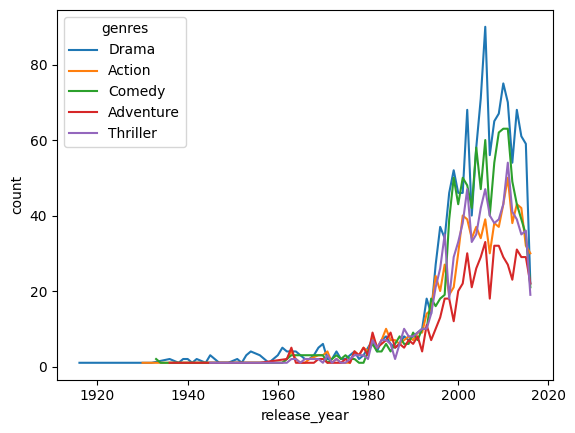

In [41]:
sns.lineplot(data=genre_counts_top, x='release_year', y='count', hue='genres')

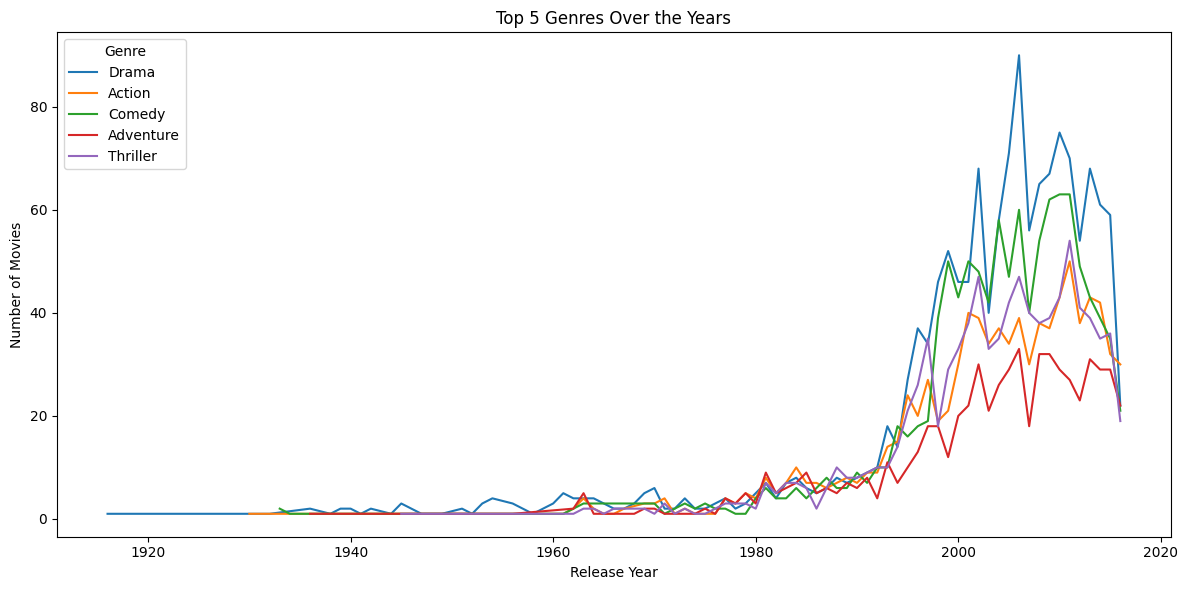

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_counts_top, x='release_year', y='count', hue='genres')
plt.title('Top 5 Genres Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


### Findings:

- Drama is consistently the most produced genre, peaking around 2005–2010.
- Comedy and Action also became more popular in the early 2000s.
- Adventure and Thriller genres grew steadily after 1980, but less than Drama and Comedy.
- All genres show a decline after 2015, possibly due to incomplete data for recent years.


### Q2: What factors are most associated with high movie revenue?

To answer this question, I will explore the relationship between revenue and several independent variables such as:
- Budget
- Popularity
- Average vote rating
- Runtime
- Number of genres

I will use scatter plots and correlation analysis to determine which factors are most positively related to high revenue.


Step 1: Create a column for number of genres

In [43]:
# Count how many genres each movie has
df_clean['num_genres'] = df_clean['genres'].apply(lambda x: len(x) if isinstance(x, list) else 0)

C:\Users\janaa\AppData\Local\Temp\ipykernel_7864\3835894204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['num_genres'] = df_clean['genres'].apply(lambda x: len(x) if isinstance(x, list) else 0)


Step 2: Correlation Matrix

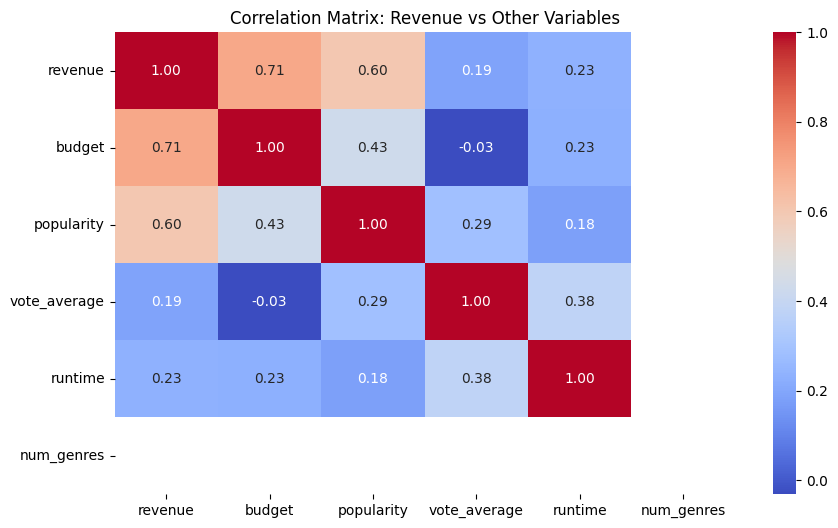

In [44]:
# Select relevant columns for correlation
corr_columns = ['revenue', 'budget', 'popularity', 'vote_average', 'runtime', 'num_genres']
correlation_matrix = df_clean[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Revenue vs Other Variables')
plt.show()

Step 4: Scatter Plots

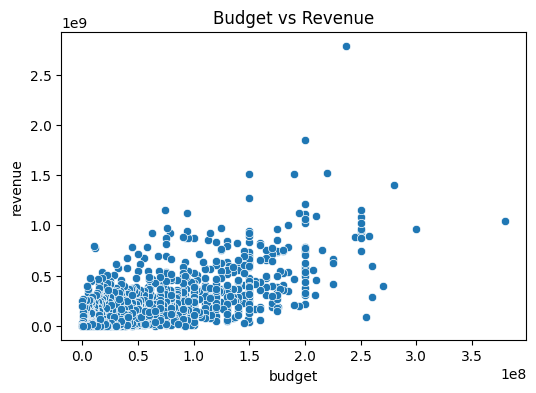

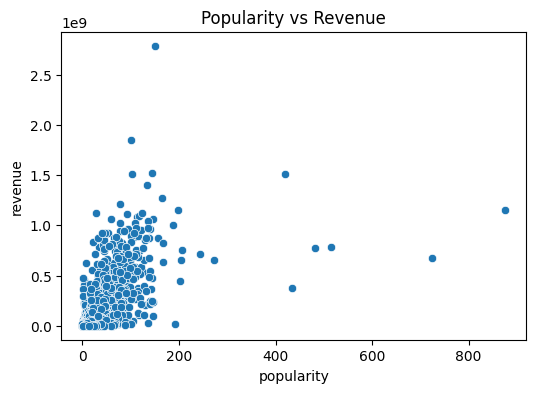

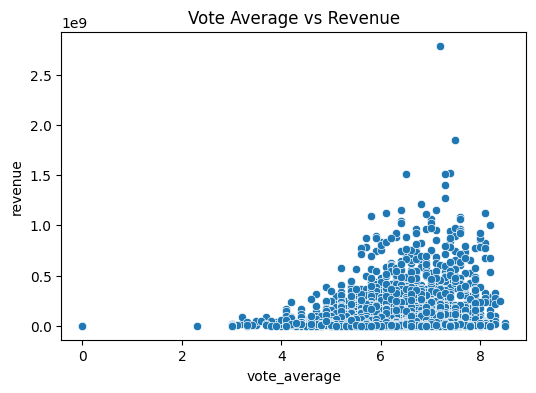

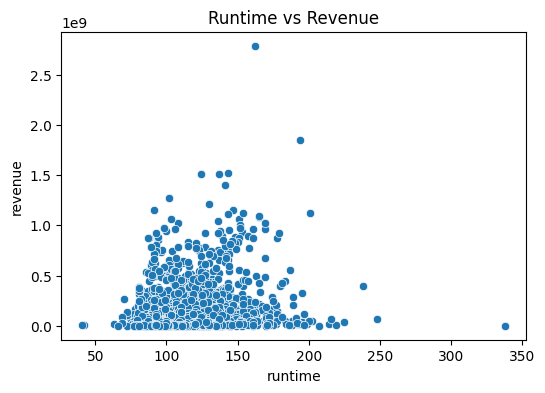

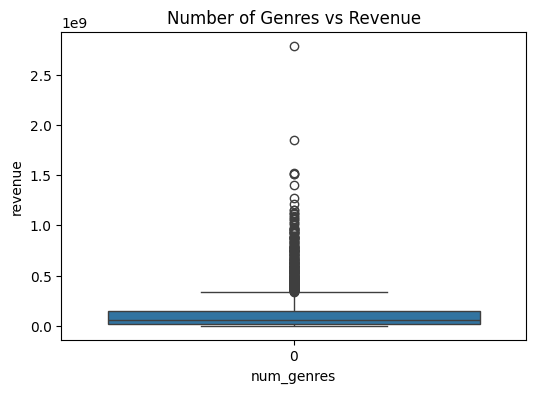

In [45]:
# Budget vs Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_clean, x='budget', y='revenue')
plt.title('Budget vs Revenue')
plt.show()

# Popularity vs Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_clean, x='popularity', y='revenue')
plt.title('Popularity vs Revenue')
plt.show()

# Vote Average vs Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_clean, x='vote_average', y='revenue')
plt.title('Vote Average vs Revenue')
plt.show()

# Runtime vs Revenue
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_clean, x='runtime', y='revenue')
plt.title('Runtime vs Revenue')
plt.show()

# Number of Genres vs Revenue
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean, x='num_genres', y='revenue')
plt.title('Number of Genres vs Revenue')
plt.show()


### Findings

- **Budget** had the strongest positive correlation with revenue (0.71). This suggests that movies with higher budgets tend to generate more revenue.
- **Popularity** also showed a strong positive relationship (0.60), indicating that more popular films generally perform better financially.
- **Vote average**, **runtime**, and **number of genres** had very weak or no correlation with revenue, suggesting they are not strong indicators of financial success.


## Conclusions

In this project, I analyzed a dataset of over 10,000 movies from TMDb to investigate two main questions:

1. **What are the most popular genres over the years?**  
   The analysis showed that **Drama**, **Comedy**, and **Action** were the most frequently produced genres over time. Drama consistently ranked highest, especially between 2000 and 2010. A notable increase in the number of produced movies started in the 1990s.

2. **What factors are most associated with high movie revenue?**  
   From the correlation analysis and scatter plots, it was found that:
   - **Budget** has a strong positive relationship with revenue (r = 0.71)
   - **Popularity** also has a notable correlation (r = 0.60)
   - **Vote average**, **runtime**, and **number of genres** have weak or no correlation

### Limitations:

- The dataset contains many missing or zero values in key fields such as `budget` and `revenue`, which could reduce accuracy.
- The analysis is based on correlation only, **not causation**, and no statistical tests were performed.
- Some variables (e.g., genres) required significant preprocessing due to inconsistent formats (e.g., nested dictionaries).
- Revenue and budget values are not adjusted for inflation unless using the `_adj` versions.

### Suggestions for Further Analysis:

- Include the adjusted revenue/budget columns to account for inflation.
- Investigate how combinations of variables (e.g., high budget + high popularity) affect revenue.
- Explore audience-related data, such as user ratings or number of votes, in more detail.

